In [23]:
import pandas as pd
import statsmodels.api as sm

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
veg_merged = gpd.read_file("veg_data.gpkg")
heat_merged = gpd.read_file("heat_data.gpkg")

In [19]:
allmerged = veg_merged.merge(heat_merged[['geocode', 'heat_coverage']], on='geocode', how='left')
allmerged = allmerged[allmerged['como.rate'] != 0]

         geocode bufferzone  como.rate  veg_coverage veg_cat  \
0    42101039100     Inside   0.000000      0.105444    High   
1    42101980902     Inside   0.000000      0.073512  Medium   
2    42101980904    Outside   0.000000      0.044030  Medium   
3    42101980903     Inside   0.000000      0.053183  Medium   
4    42101980906    Outside   0.000000      0.046935  Medium   
..           ...        ...        ...           ...     ...   
403  42101013602    Outside   0.143333      0.048246  Medium   
404  42101034502    Outside   0.279412      0.059248  Medium   
405  42101000902     Inside   0.225490      0.072492  Medium   
406  42101001201     Inside   0.132701      0.066854  Medium   
407  42101002702     Inside   0.198238      0.055700  Medium   

                                              geometry  heat_coverage  
0    MULTIPOLYGON (((-75.22235 39.93105, -75.22129 ...       0.334663  
1    MULTIPOLYGON (((-75.20684 39.93409, -75.20655 ...       0.325128  
2    MULTIPOLYG

In [20]:
print(allmerged)


         geocode bufferzone  como.rate  veg_coverage veg_cat  \
6    42101036700     Inside   0.134615      0.058302  Medium   
7    42101034702    Outside   0.262295      0.100838    High   
8    42101034801    Outside   0.216667      0.087644    High   
9    42101034802    Outside   0.276923      0.087748    High   
10   42101034900    Outside   0.250000      0.070949  Medium   
..           ...        ...        ...           ...     ...   
403  42101013602    Outside   0.143333      0.048246  Medium   
404  42101034502    Outside   0.279412      0.059248  Medium   
405  42101000902     Inside   0.225490      0.072492  Medium   
406  42101001201     Inside   0.132701      0.066854  Medium   
407  42101002702     Inside   0.198238      0.055700  Medium   

                                              geometry  heat_coverage  
6    MULTIPOLYGON (((-75.14886 39.95774, -75.14885 ...       0.322135  
7    MULTIPOLYGON (((-75.03647 40.05396, -75.03637 ...       0.321544  
8    MULTIPOLYG

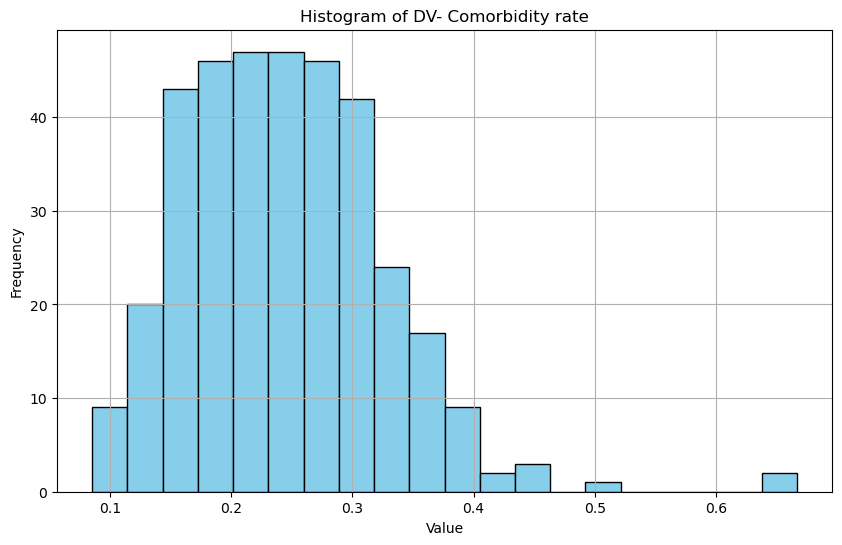

In [21]:
data=allmerged['como.rate']
plt.figure(figsize=(10, 6))
plt.hist(data, bins=20, color='skyblue', edgecolor='black')  # Flatten in case it's a 2D array
plt.title('Histogram of DV- Comorbidity rate')  # Change to 'dv' if necessary
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [24]:
X = allmerged[['veg_coverage','heat_coverage']]
X = sm.add_constant(X)
y = allmerged['como.rate'] 

In [29]:
model = sm.OLS(y, X).fit()  # Ordinary Least Squares (OLS) regression

# Step 4: Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              como.rate   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     9.590
Date:                Sun, 27 Apr 2025   Prob (F-statistic):           8.79e-05
Time:                        18:40:23   Log-Likelihood:                 398.91
No. Observations:                 358   AIC:                            -791.8
Df Residuals:                     355   BIC:                            -780.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0172      0.063     -0.271

In [30]:
import pickle
import statsmodels.api as sm
with open('modelupdate.pkl', 'wb') as file:
    pickle.dump(model, file)
